In [1]:
'''
Deploy SqueezeNet, requires 'squeezenet_architecture.py'

Train and evaluate against the CIFAR-10 dataset avaliable in tensorflow. Code adapted from the paper 'SqueezeNet :
AlexNet-Level Accuracy with 50x fewer parameters and <0.5MB model size' by: Iandola et al.

'''

# import libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%run squeezenet_architecture.ipynb # get fire_mod and SqueezeNet from other notebook

# shortcut to modules provided in tf
datasets = tf.keras.datasets
layers =  tf.keras.layers
models = tf.keras.models
losses = tf.keras.losses
optimizers = tf.keras.optimizers 
metrics = tf.keras.metrics
preprocessing_image = tf.keras.preprocessing.image
utils = tf.keras.utils
callbacks = tf.keras.callbacks

In [2]:
# Load the CIFAR-10 dataset through tf
# Note : could take a few minutes depending on machine...

(x_train, y_train), (x_test, y_test)= datasets.cifar10.load_data()


170500096/170498071 [==============================] - 15s 0us/step


In [3]:
# one hot encode the target

y_train = utils.to_categorical(y_train, num_classes = 10)
y_test = utils.to_categorical(y_test, num_classes = 10)

# preprocessing with ImageDataGenerator (training data generator has additional augumentation steps, the test only has rescale)

train_data_gen = preprocessing_image.ImageDataGenerator(
    rescale = 1/255,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip=True)

test_data_gen = preprocessing_image.ImageDataGenerator(rescale = 1/255)

# create a data generator to feed the network

train_generator = train_data_gen.flow(x = x_train, y = y_train, batch_size = 32, shuffle = True) # 32 images at a time
test_generator = train_data_gen.flow(x = x_test, y = y_test, batch_size = 32, shuffle = True)

In [4]:
# Compile model (add loss, optimizer, etc)

def compile_squeeze(model):
    
    # loss - multi class (10) classification problem ~ crossentropy
    
    loss = losses.categorical_crossentropy
    
    # optimizer
    # paper used a lr of 0.04, but I am not sure which optimizer they used
    # I used ADAM optimizer with a lr = 0.001, which is typically a good 'starting point'
    
    optimizer = optimizers.Adam(lr=0.001)
                                          
    # metrics - categorical accuracy
    
    metric = [metrics.categorical_accuracy]
    
    # compile model with loss, optimizer, and evaluation metrics
    
    model.compile(optimizer, loss, metric)
    
    return model

In [5]:
# compile the model

squeezeNet = SqueezeNet()
squeezeNet = compile_squeeze(squeezeNet)

In [6]:
training = squeezeNet.fit_generator(
    train_generator,
    steps_per_epoch = 400,
    epochs = 250,
    validation_data = test_generator,
    validation_steps = 200)

Epoch 1/250
400/400 [==============================] - 30s 74ms/step - loss: 2.1841 - categorical_accuracy: 0.1523 - val_loss: 2.1279 - val_categorical_accuracy: 0.2114
Epoch 2/250
400/400 [==============================] - 28s 70ms/step - loss: 1.8876 - categorical_accuracy: 0.2639 - val_loss: 1.7665 - val_categorical_accuracy: 0.3073
Epoch 3/250
400/400 [==============================] - 28s 69ms/step - loss: 1.7694 - categorical_accuracy: 0.3165 - val_loss: 1.7527 - val_categorical_accuracy: 0.3478
Epoch 4/250
400/400 [==============================] - 28s 70ms/step - loss: 1.6819 - categorical_accuracy: 0.3605 - val_loss: 1.5785 - val_categorical_accuracy: 0.4123
Epoch 5/250
400/400 [==============================] - 27s 69ms/step - loss: 1.5901 - categorical_accuracy: 0.4010 - val_loss: 1.5100 - val_categorical_accuracy: 0.4387
Epoch 6/250
400/400 [==============================] - 28s 69ms/step - loss: 1.5316 - categorical_accuracy: 0.4385 - val_loss: 1.4418 - val_categorical_acc

400/400 [==============================] - 27s 68ms/step - loss: 0.9241 - categorical_accuracy: 0.6734 - val_loss: 0.9466 - val_categorical_accuracy: 0.6664
Epoch 50/250
400/400 [==============================] - 27s 68ms/step - loss: 0.9314 - categorical_accuracy: 0.6705 - val_loss: 0.9655 - val_categorical_accuracy: 0.6627
Epoch 51/250
400/400 [==============================] - 27s 68ms/step - loss: 0.9097 - categorical_accuracy: 0.6848 - val_loss: 0.9702 - val_categorical_accuracy: 0.6556
Epoch 52/250
400/400 [==============================] - 28s 69ms/step - loss: 0.8972 - categorical_accuracy: 0.6834 - val_loss: 0.9212 - val_categorical_accuracy: 0.6769
Epoch 53/250
400/400 [==============================] - 28s 69ms/step - loss: 0.9020 - categorical_accuracy: 0.6820 - val_loss: 0.9222 - val_categorical_accuracy: 0.6773
Epoch 54/250
400/400 [==============================] - 28s 69ms/step - loss: 0.9135 - categorical_accuracy: 0.6831 - val_loss: 0.9089 - val_categorical_accuracy: 

400/400 [==============================] - 27s 67ms/step - loss: 0.7278 - categorical_accuracy: 0.7470 - val_loss: 0.7911 - val_categorical_accuracy: 0.7242
Epoch 98/250
400/400 [==============================] - 27s 68ms/step - loss: 0.7465 - categorical_accuracy: 0.7370 - val_loss: 0.8252 - val_categorical_accuracy: 0.7150
Epoch 99/250
400/400 [==============================] - 27s 67ms/step - loss: 0.7023 - categorical_accuracy: 0.7505 - val_loss: 0.8093 - val_categorical_accuracy: 0.7220
Epoch 100/250
400/400 [==============================] - 27s 67ms/step - loss: 0.7213 - categorical_accuracy: 0.7466 - val_loss: 0.8476 - val_categorical_accuracy: 0.7102
Epoch 101/250
400/400 [==============================] - 27s 67ms/step - loss: 0.7388 - categorical_accuracy: 0.7396 - val_loss: 0.8065 - val_categorical_accuracy: 0.7180
Epoch 102/250
400/400 [==============================] - 27s 68ms/step - loss: 0.7191 - categorical_accuracy: 0.7514 - val_loss: 0.8055 - val_categorical_accurac

400/400 [==============================] - 27s 67ms/step - loss: 0.6545 - categorical_accuracy: 0.7707 - val_loss: 0.7877 - val_categorical_accuracy: 0.7331
Epoch 146/250
400/400 [==============================] - 27s 67ms/step - loss: 0.6359 - categorical_accuracy: 0.7734 - val_loss: 0.7624 - val_categorical_accuracy: 0.7398
Epoch 147/250
400/400 [==============================] - 28s 70ms/step - loss: 0.6371 - categorical_accuracy: 0.7739 - val_loss: 0.7835 - val_categorical_accuracy: 0.7388
Epoch 148/250
400/400 [==============================] - 28s 69ms/step - loss: 0.6685 - categorical_accuracy: 0.7697 - val_loss: 0.7293 - val_categorical_accuracy: 0.7462
Epoch 149/250
400/400 [==============================] - 27s 68ms/step - loss: 0.6533 - categorical_accuracy: 0.7753 - val_loss: 0.7658 - val_categorical_accuracy: 0.7417
Epoch 150/250
400/400 [==============================] - 27s 68ms/step - loss: 0.6306 - categorical_accuracy: 0.7783 - val_loss: 0.7804 - val_categorical_accur

Epoch 193/250
400/400 [==============================] - 27s 67ms/step - loss: 0.5920 - categorical_accuracy: 0.7932 - val_loss: 0.7498 - val_categorical_accuracy: 0.7514
Epoch 194/250
400/400 [==============================] - 27s 67ms/step - loss: 0.6103 - categorical_accuracy: 0.7862 - val_loss: 0.7625 - val_categorical_accuracy: 0.7395
Epoch 195/250
400/400 [==============================] - 27s 67ms/step - loss: 0.6151 - categorical_accuracy: 0.7852 - val_loss: 0.7770 - val_categorical_accuracy: 0.7391
Epoch 196/250
400/400 [==============================] - 27s 67ms/step - loss: 0.5939 - categorical_accuracy: 0.7928 - val_loss: 0.7471 - val_categorical_accuracy: 0.7452
Epoch 197/250
400/400 [==============================] - 27s 68ms/step - loss: 0.5945 - categorical_accuracy: 0.7929 - val_loss: 0.7670 - val_categorical_accuracy: 0.7459
Epoch 198/250
400/400 [==============================] - 27s 67ms/step - loss: 0.5920 - categorical_accuracy: 0.7943 - val_loss: 0.7969 - val_cat

Epoch 241/250
400/400 [==============================] - 27s 67ms/step - loss: 0.5796 - categorical_accuracy: 0.7966 - val_loss: 0.7552 - val_categorical_accuracy: 0.7509
Epoch 242/250
400/400 [==============================] - 27s 68ms/step - loss: 0.5857 - categorical_accuracy: 0.7980 - val_loss: 0.7859 - val_categorical_accuracy: 0.7403
Epoch 243/250
400/400 [==============================] - 27s 67ms/step - loss: 0.5614 - categorical_accuracy: 0.8041 - val_loss: 0.7572 - val_categorical_accuracy: 0.7519
Epoch 244/250
400/400 [==============================] - 27s 67ms/step - loss: 0.5843 - categorical_accuracy: 0.7974 - val_loss: 0.7402 - val_categorical_accuracy: 0.7467
Epoch 245/250
400/400 [==============================] - 27s 67ms/step - loss: 0.5630 - categorical_accuracy: 0.8026 - val_loss: 0.7364 - val_categorical_accuracy: 0.7539
Epoch 246/250
400/400 [==============================] - 27s 68ms/step - loss: 0.5784 - categorical_accuracy: 0.8004 - val_loss: 0.7801 - val_cat

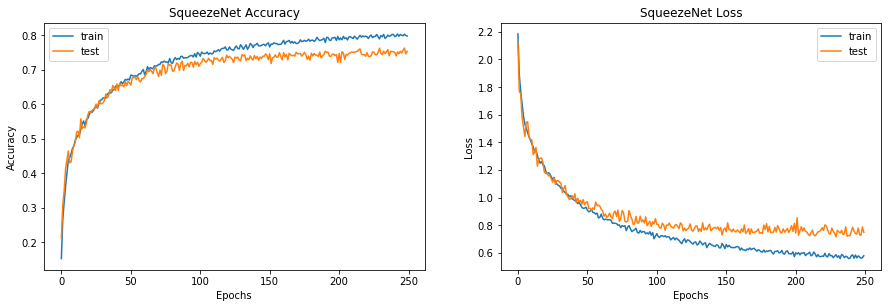

In [7]:
def plot_accuracy_and_loss(training):
    plt.figure(1, figsize= (15, 10))
    
    # plot train and test accuracy
    plt.subplot(221)
    plt.plot(training.history['categorical_accuracy'])
    plt.plot(training.history['val_categorical_accuracy'])
    plt.title('SqueezeNet Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['train', 'test'], loc='upper left')

    # plot train and test loss
    plt.subplot(222)
    plt.plot(training.history['loss'])
    plt.plot(training.history['val_loss'])
    plt.title('SqueezeNet Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['train', 'test'], loc='upper right')
    
    plt.show()
    
plot_accuracy_and_loss(training)

In [8]:
# save model architecture
model_json = squeezeNet.to_json()
open('models/squeeze_net.json', 'w').write(model_json)

# save model's learned weights
squeezeNet.save_weights('models/squeeze_net.h5', overwrite=True)